Temas Selectos de Mecánica Cuántica  
Hyperfine splitting of Cesium 133  
César Muro Cabral

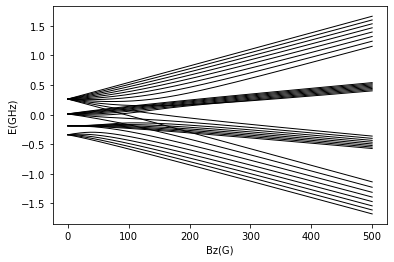

In [8]:
#In this code we obtain the hyperfine splitting of Cesium 133
#with a magnetic fiel along the z-axis. First the state 6P3/2.
#We import all the libraries that we could need
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
import scipy.constants as pc
from brian2 import *
import scipy.linalg as la
import pandas as pd
#First we define nuclear spin of the Cesium 133
I=7/2
#We start by defining the neccesary matrices for the computations
#We define the matrices Ix,Iy, and Iz. First we need to define I+ (splus) and I-(minus)
#An identity matrix is neccesary
idI=np.identity(int(2*I+1),dtype=int)
Iplus=np.eye(int(2*I+1),k=1)

#Here we create a list composed by the eigenvalues of I+
sp=[]
m=-I
for i in range(int(2*I)):
    x=np.sqrt(I*(I+1)-m*(m+1))
    sp.append(x)
    m=m+1
#Then we construct the matrix Iplus
for i in range(len(sp)):
    Iplus[i]=Iplus[i]*sp[i]

#We create the matrix Iz
Iz=np.identity(int(2*I+1))
sp=[]
m=I
for i in range(int(2*I+1)):
    sp.append(m)
    m=m-1
for i in range(len(sp)):
    Iz[i]=Iz[i]*sp[i]

#Now we define the matrix Iminus
Iminus=np.transpose(Iplus)
#And the matrices Ix and Iy are
Ix=(Iplus+Iminus)/2
Iy=(Iplus-Iminus)/2j



#The other important quantum number is the electronic total angular momentum.
#As we are dealing with the D2 line  we have J=3/2. We have to construct
#all the previous matrices but now with this quantum number
J=3/2
idJ=np.identity(int(2*J+1),dtype=int)
Jplus=np.eye(int(2*J+1),k=1)
   
   
#Here we create a list composed by the eigenvalues of J+
sp=[]
J=3/2
m=-J
for i in range(int(2*J)):
    x=np.sqrt(J*(J+1)-m*(m+1))
    sp.append(x)
    m=m+1
#Then we construct the matrix Iplus
for i in range(len(sp)):
    Jplus[i]=Jplus[i]*sp[i]
 
 
 
#We create the matrix Jz
Jz=np.identity(int(2*J+1))
sp=[]
m=J
for i in range(int(2*J+1)):
    sp.append(m)
    m=m-1
for i in range(len(sp)):
    Jz[i]=Jz[i]*sp[i]
#Now we define the matrix Jminus
Jminus=np.transpose(Jplus)
#And the matrices Jx,Jy and Jz
Jx=(Jplus+Jminus)/2
Jy=(Jplus-Jminus)/2j
 
 
 
#Since for this level the atom has I=7/2, J=3/2  (L=1, S=1/2), 
#the basis for the description is the tensor product of a Spin(7/2), and a Spin-(3/2). 
Ix=np.kron(Ix,idJ)
Iy=np.kron(Iy,idJ)
Iz=np.kron(Iz,idJ)
Jx=np.kron(idI,Jx)
Jy=np.kron(idI,Jy)
Jz=np.kron(idI,Jz)
  
  
  
#Now we define the physical constants that we will employ
muB=0.0013996245
hbar=pc.value('Planck constant over 2 pi')
#For the ground state we write the magnetic dipole constant
Ag= 3.417341305
#Nuclear g-factor
gI= -0.00039885395
#Fine structure Landé-g factor of 6P3/2
gJP=1.3340
#For the line D2 we write the magnetic dipole constant
Ap=50.275/1000
#Magnetic quadrupole constant
Bq=-0.53/1000
  
  
  
#Here we finally define the Hamiltonian taking
#into account the quadrupole interaction. We obtain eigenvalues as function 
#of the magnetic field and plot
  
  
#### np.linalg.matrix_power(A, 3)

eigenvalores=[]
for Bz in range(0,501): #Evaluamos la matriz para cada valor del campo magnético
    matriz_evaluada = np.array(Ap*(np.dot(Ix,Jx)+np.dot(Iy,Jy)+np.dot(Iz,Jz))+(muB)*Bz*(gI*Iz+gJP*Jz))+Bq*(3*np.linalg.matrix_power((np.dot(Ix,Jx)+np.dot(Iy,Jy)+np.dot(Iz,Jz)),2)+(3/2)*(np.dot(Ix,Jx)+np.dot(Iy,Jy)+np.dot(Iz,Jz))-np.dot((np.linalg.matrix_power(Ix,2) + np.linalg.matrix_power(Iy,2) + np.linalg.matrix_power(Iz,2)),(np.linalg.matrix_power(Jx,2) + np.linalg.matrix_power(Jy,2) + np.linalg.matrix_power(Jz,2))))/((2*I*(2*I - 1)*J*(2*J - 1))) 
    eigvals, eigvecs = la.eig(matriz_evaluada)  #obtenemos tanto los eigenvalores como los eigenvectores
    eigvals = eigvals.real  # conservamos únicamente los eigenvalores
    n_eigvals=[] # esta lista la creamos únicamente para guardar los eigenvalores de forma correcta porque los arroja con un formato diferente al necesario
    for i in range(len(eigvals)): #en este loop cambiamos los espacios por comas
        n_eigvals.append(float(str(eigvals[i]).replace(" ",",")))
    
    n_eigvals.sort()
    n_eigvals.insert(0,Bz)  #Insertamos una columna al inicio donde guardaremos los valores del campo magnético
    eigenvalores.append(n_eigvals)  #Agregamos a la tabla general los eigenvalores obtenidos como una fila
#print(eigenvalores)
    
columnas=['Bz'] #En esta linea y el loop siguiente definimos los nombres de las columnas
for i in range(1,len(n_eigvals)):
    columnas.append('Lambda_'+str(i))

eigenvalores = pd.DataFrame(eigenvalores, columns = columnas) #Transformamos la tabla general en un DataFrame
#print(\"Los eigenvalores son\")
#print(eigenvalores) #Imprimimos nuestra tabla general que contiene todos los eigenvalores


lambdas=columnas[1:] #definimos cuales columnas seran nuestras variables dependientes\n",
#plt.plot(eigenvalores['Bz'],eigenvalores[lambdas])   #funcion para crear la grafia, la sintaxis es: plt.plot(variable independiente, variable dependiente)
plt.xlabel('Bz(G)')  #nombramos el eje x
plt.ylabel('E(GHz)')   #NOmbramos el eje y
#plt.savefig('hyperfinesppliting.pdf',)  #Guardamos la grafica en el equipo
plt.setp(plt.plot(eigenvalores['Bz'],eigenvalores[lambdas]) , color='k', linewidth=1.0)   
plt.show()   #Pedimos a python que muestre la grafica

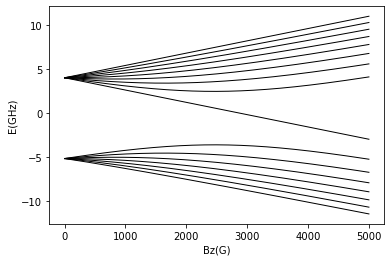

In [9]:
#Now we the state 6S1/2, which is easier than the previous since J=1/2 and
#we don't considerer the quadrupole interaction.
#In this code we obtain the hyperfine splitting of Cesium 133
#with a magnetic fiel along the z-axis
#We import all the libraries that we could need
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
import scipy.constants as pc
from brian2 import *
import scipy.linalg as la
import pandas as pd
#First we define nuclear spin of the Cesium 133
I=7/2
#We start by defining the neccesary matrices for the computations
#We define the matrices Ix,Iy, and Iz. First we need to define I+ (splus) and I-(minus)
#An identity matrix is neccesary
idI=np.identity(int(2*I+1),dtype=int)
Iplus=np.eye(int(2*I+1),k=1)

#Here we create a list composed by the eigenvalues of I+
sp=[]
m=-I
for i in range(int(2*I)):
    x=np.sqrt(I*(I+1)-m*(m+1))
    sp.append(x)
    m=m+1
#Then we construct the matrix Iplus
for i in range(len(sp)):
    Iplus[i]=Iplus[i]*sp[i]

#We create the matrix Iz
Iz=np.identity(int(2*I+1))
sp=[]
m=I
for i in range(int(2*I+1)):
    sp.append(m)
    m=m-1
for i in range(len(sp)):
    Iz[i]=Iz[i]*sp[i]

#Now we define the matrix Iminus
Iminus=np.transpose(Iplus)
#And the matrices Ix,Iy and Iz
Ix=(Iplus+Iminus)/2
Iy=(Iplus-Iminus)/2j



#The other important quantum number is the total angular momentum.
#That in the case of the 5s1/2, we have J=1/2. We have to construct
#all the previous matrices but now with this quantum number
J=1/2
idJ=np.identity(int(2*J+1),dtype=int)
Jplus=np.eye(int(2*J+1),k=1)
   
   
#Here we create a list composed by the eigenvalues of J+
sp=[]
J=1/2
m=-J
for i in range(int(2*J)):
    x=np.sqrt(J*(J+1)-m*(m+1))
    sp.append(x)
    m=m+1
#Then we construct the matrix Iplus
for i in range(len(sp)):
    Jplus[i]=Jplus[i]*sp[i]
 
 
 
#We create the matrix Jz
Jz=np.identity(int(2*J+1))
sp=[]
m=J
for i in range(int(2*J+1)):
    sp.append(m)
    m=m-1
for i in range(len(sp)):
    Jz[i]=Jz[i]*sp[i]
#Now we define the matrix Jminus
Jminus=np.transpose(Jplus)
#And the matrices Jx,Jy and Jz
Jx=(Jplus+Jminus)/2
Jy=(Jplus-Jminus)/2j
 
 
 
#Since for this level the atom has I=7/2, J=1/2  (L=0, S=1/2), 
#the basis for the description is the tensor product of a Spin(7/2), and a Spin-(1/2). 
Ix=np.kron(Ix,idJ)
Iy=np.kron(Iy,idJ)
Iz=np.kron(Iz,idJ)
Jx=np.kron(idI,Jx)
Jy=np.kron(idI,Jy)
Jz=np.kron(idI,Jz)
  
  
  
#Now we define the physical constants that we will employ
muB=0.0013996245
hbar=pc.value('Planck constant over 2 pi')
#For the ground state we write the magnetic dipole constant
Ag=2.2981579425
#Nuclear g-factor
gI= -0.00039885395
#Fine structure Landé-g factor of 6S1/2
gJS=2.00254032
#Fine structure Landé-g factor of 6P3/2
gJP=1.3340
#For the ground state we write the magnetic dipole constant
Ap=50.275/1000
#Magnetic quadrupole constant
Bq=-0.53/1000
  
  
  
#Here we finally define the Hamiltonian and obtain eigenvalues as function 
#of the magnetic field
  
  
#### np.linalg.matrix_power(A, 3)

eigenvalores=[]
for Bz in range(0,5001): #Evaluamos la matriz para cada valor del campo magnético
    matriz_evaluada = np.array(Ag*(np.dot(Ix,Jx)+np.dot(Iy,Jy)+np.dot(Iz,Jz))+(muB)*Bz*(gI*Iz+gJS*Jz))
    eigvals, eigvecs = la.eig(matriz_evaluada)  #obtenemos tanto los eigenvalores como los eigenvectores
    eigvals = eigvals.real  # conservamos únicamente los eigenvalores
    n_eigvals=[] # esta lista la creamos únicamente para guardar los eigenvalores de forma correcta porque los arroja con un formato diferente al necesario
    for i in range(len(eigvals)): #en este loop cambiamos los espacios por comas
        n_eigvals.append(float(str(eigvals[i]).replace(" ",",")))
    
    n_eigvals.sort()
    n_eigvals.insert(0,Bz)  #Insertamos una columna al inicio donde guardaremos los valores del campo magnético
    eigenvalores.append(n_eigvals)  #Agregamos a la tabla general los eigenvalores obtenidos como una fila
#print(eigenvalores)
    
columnas=['Bz'] #En esta linea y el loop siguiente definimos los nombres de las columnas
for i in range(1,len(n_eigvals)):
    columnas.append('Lambda_'+str(i))

eigenvalores = pd.DataFrame(eigenvalores, columns = columnas) #Transformamos la tabla general en un DataFrame
#print(\"Los eigenvalores son\")
#print(eigenvalores) #Imprimimos nuestra tabla general que contiene todos los eigenvalores


lambdas=columnas[1:] #definimos cuales columnas seran nuestras variables dependientes\n",
#plt.plot(eigenvalores['Bz'],eigenvalores[lambdas])   #funcion para crear la grafia, la sintaxis es: plt.plot(variable independiente, variable dependiente)
plt.xlabel('Bz(G)')  #nombramos el eje x
plt.ylabel('E(GHz)')   #NOmbramos el eje y
#plt.savefig('hyperfinesppliting.pdf',)  #Guardamos la grafica en el equipo
plt.setp(plt.plot(eigenvalores['Bz'],eigenvalores[lambdas]) , color='k', linewidth=1.0)   
plt.show()   #Pedimos a python que muestre la grafica